In [4]:
rv = sp.stats.norm(loc=10, scale=10)
rv
# The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

In [5]:
xx = np.linspace(-40, 60, 1000)
pdf = rv.pdf

# Returns num evenly spaced samples, calculated over the interval [start, stop].

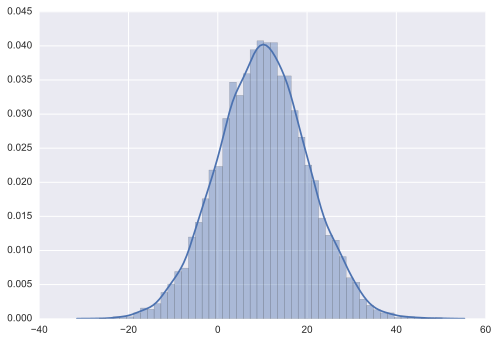

In [6]:
sns.distplot(rv.rvs(size=10000, random_state=1))

# http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.norm.html
# on sns : https://www.datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/

In [10]:
tips = sns.load_dataset("tips")
# http://stackoverflow.com/questions/30336324/seaborn-load-dataset



(100, 1) (100,) ()
(102, 2)
(102,)


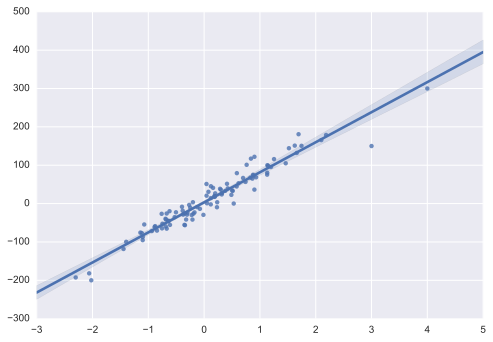

In [15]:
# https://www.datascienceschool.net/view-notebook/58269d7f52bd49879965cdc4721da42d/
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
# sklearn.datasets.make_regression

from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)

print(X0.shape, y.shape, coef.shape)

# add high-leverage points
X0 = np.vstack([X0, np.array([[4],[3]])])

# http://statsmodels.sourceforge.net/devel/generated/statsmodels.tools.tools.add_constant.html

X = sm.add_constant(X0)

print(X.shape)
y = np.hstack([y, [300, 150]])
print(y.shape)
x = X0
#plt.scatter(X0, y)
#plt.show()
rplot = sns.regplot(x=x, y=y)

In [17]:
# https://www.datascienceschool.net/view-notebook/58269d7f52bd49879965cdc4721da42d/

model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           1.61e-61
Time:                        01:41:12   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

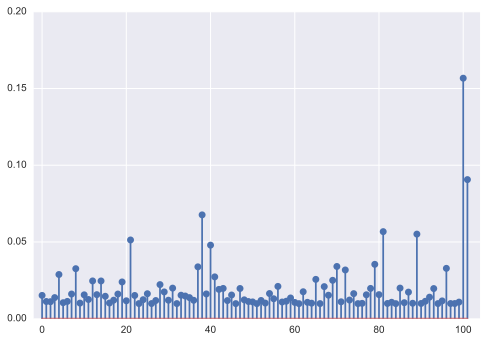

hat.sum() = 2.0


In [18]:
# https://www.datascienceschool.net/view-notebook/6d9c833f132e4e789e35632b49be2c2d/

influence = result.get_influence()
hat = influence.hat_matrix_diag
plt.stem(hat)
plt.axis([ -2, len(y)+2, 0, 0.2 ])
plt.show()
print("hat.sum() =", hat.sum())

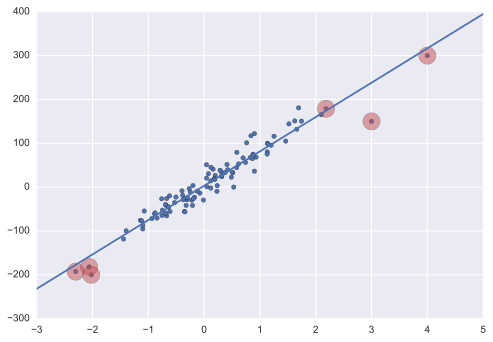

In [23]:
plt.scatter(X0, y)
# http://statsmodels.sourceforge.net/devel/generated/statsmodels.graphics.regressionplots.abline_plot.html
sm.graphics.abline_plot(model_results=result, ax=plt.gca())

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.axis([-3, 5, -300, 400])
plt.show()

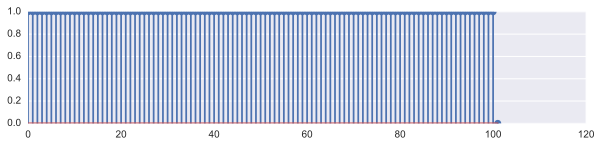

In [24]:
plt.figure(figsize=(10, 2))
plt.stem(result.outlier_test().ix[:, -1])
plt.show()

In [25]:
import pandas_datareader.data as wb

symbols = ['AAPL', 'MSFT', 'YHOO', 'DB', 'GLD']
noa = len(symbols)
data = pd.DataFrame()
for sym in symbols:
    data[sym] = wb.DataReader(sym, data_source='yahoo',
                              end='2014-09-12')['Adj Close']
data.columns = symbols
data.tail()

AAPL       MSFT       YHOO         DB         GLD
Date                                                              
2014-09-08  95.195338  44.324409  41.810001  34.039067  120.730003
2014-09-09  94.837239  44.601017  40.779999  33.834365  120.870003
2014-09-10  97.750397  44.677325  41.139999  34.399735  120.260002
2014-09-11  98.166562  44.829937  41.259998  34.360744  119.470001
2014-09-12  98.389165  44.543790  42.880001  34.146292  118.379997

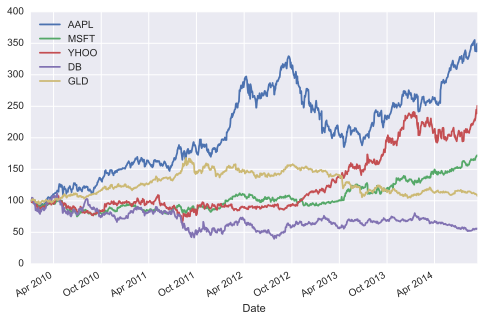

In [26]:
(data / data.ix[0] * 100).plot(figsize=(8, 5), grid=True)
plt.show()

In [27]:
rets = np.log(data / data.shift(1))
rets.mean() * 252

AAPL    0.267080
MSFT    0.114505
YHOO    0.196165
DB     -0.125174
GLD     0.016054
dtype: float64

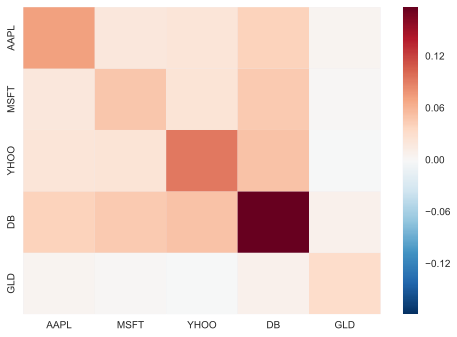

In [28]:
sns.heatmap(rets.cov() * 252)
plt.show()

# https://www.datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cov.html

In [31]:
np.random.seed(2)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([ 0.23349275,  0.01388454,  0.2943663 ,  0.2331326 ,  0.22512381])

In [32]:
# https://www.datascienceschool.net/view-notebook/4135681c2cf1474684cc63f1303fa6c7/
# 포트폴리오 return, 포트폴리오 분산 계산

prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

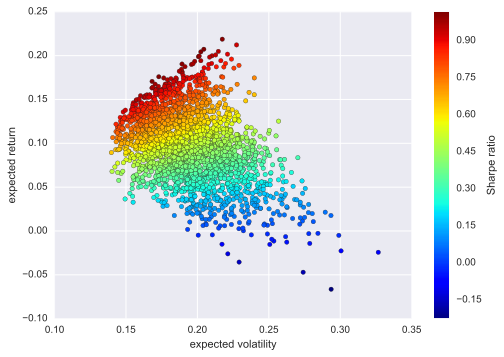

In [34]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap=mpl.cm.jet)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [35]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        포트폴리오 내의 증권 비중
    
    Returns
    =======
    pret : float
        포트폴리오 수익률의 기댓값
    pvol : float
        포트폴리오 변동성의 기댓값
    pret / pvol : float
        무위험 이자율이 0일 때의 포트폴리오 샤프 지수
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])


In [36]:
import scipy.optimize as sco

In [37]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [38]:
# constraint
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [39]:
# bound constraint
bnds = tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [40]:
noa * [1. / noa,]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [42]:
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
# Equality constraint means that the constraint function result is to be zero

opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [43]:
opts
# Success True 확인해야 함.  최소점 못 찾는 경우 있음

     fun: -1.0630084836647968
     jac: array([ -1.82956457e-04,  -7.02306628e-04,   7.18027353e-04,
         1.51409824e+00,   1.54869258e-03,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([  6.61851745e-01,   8.64634631e-02,   2.51684792e-01,
         0.00000000e+00,   3.84878219e-16])

In [44]:
opts['x'].round(3)

array([ 0.662,  0.086,  0.252,  0.   ,  0.   ])

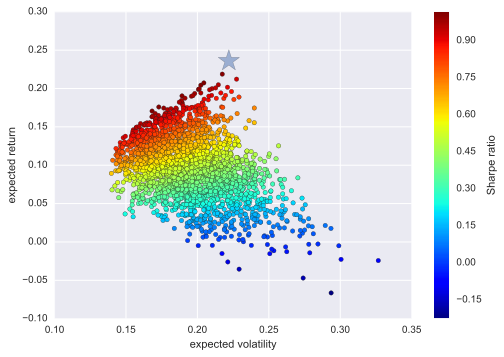

In [45]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap=mpl.cm.jet)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

pt_opts = statistics(opts['x']).round(3)
plt.scatter(pt_opts[1], pt_opts[0], marker="*", s=500, alpha=0.5)
plt.show()

In [46]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [47]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

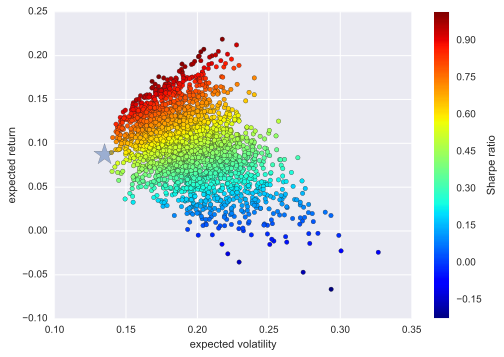

In [48]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap=mpl.cm.jet)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

pt_optv = statistics(optv['x']).round(3)
plt.scatter(pt_optv[1], pt_optv[0], marker="*", s=500, alpha=0.5)
plt.show()

In [49]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [50]:
def min_func_port(weights):
    return statistics(weights)[1]

In [51]:
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

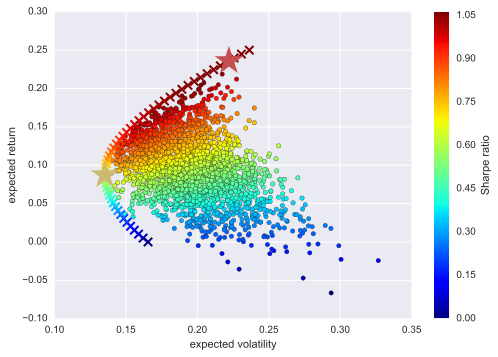

In [52]:
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o', cmap=mpl.cm.jet)
            # 무작위 포트폴리오
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x', s=70, linewidth=2, cmap=mpl.cm.jet)
            # 효율적 투자선
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=30)
            # 최대 샤프 지수를 가진 포트폴리오
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=30)
            # 최소 분산 포트폴리오
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [ ]:
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.splrep.html


In [53]:
import scipy.interpolate as sci

In [54]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [55]:
tck = sci.splrep(evols, erets)

In [56]:
def f(x):
    ''' 효율적 투자선 함수 (스플라인 근사) '''
    return sci.splev(x, tck, der=0)

def df(x):
    ''' 효율적 투자선 함수의 1차 도함수 '''
    return sci.splev(x, tck, der=1)

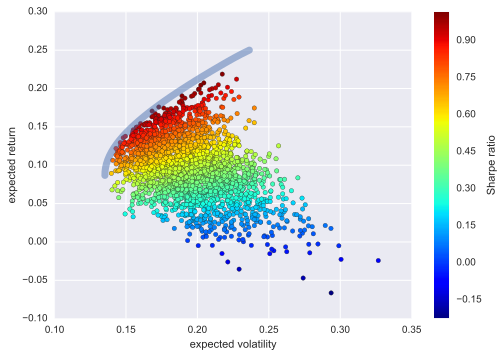

In [57]:
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o', cmap=mpl.cm.jet)
            # 무작위 포트폴리오

plt.plot(evols, f(evols), lw=7, alpha=0.5)    

plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [ ]:
# 자본 시장선

In [58]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [59]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])
opt

array([ 0.01      ,  1.0183289 ,  0.22606876])

In [60]:
np.round(equations(opt), 6)

array([ 0.,  0.,  0.])

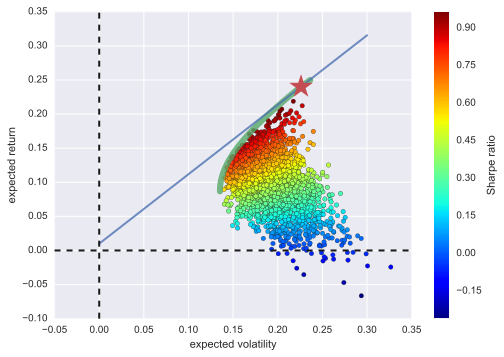

In [61]:
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o', cmap=mpl.cm.jet)
            # 무작위 포트폴리오
plt.plot(evols, erets, 'g', lw=6, alpha=0.8)
            # 효율적 투자선
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=2, alpha=0.8)
            # 자본 시장선
plt.plot(opt[2], f(opt[2]), 'r*', markersize=25.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [62]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
res['x'].round(3)

array([ 0.687,  0.057,  0.256,  0.   ,  0.   ])